In [2]:
import numpy as np
from scipy.ndimage import laplace
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [149]:
nx,ny = 30,50

u0 = np.zeros((nx,ny))
def dudt(u, t, pos, phi, kappa, gamma, dx):
    du = np.zeros((nx,ny))
    for p in pos:
        du[p[0], p[1]] += phi
    u = u.reshape((nx,ny))
    delu = laplace(u, mode='nearest')
    du += kappa * delu / (dx * dx)
    du -= gamma * u
    return du.ravel()

phi = 1
kappa = 1e-9
dx = 1e-2 / ny
t = np.linspace(0, 24 * 60 * 60, 200)

In [88]:
dx

0.0004

In [106]:
t0L = np.zeros((0,))
for iter in range(100):
    pos = np.random.randint(0, nx-1, (10,2))
    #plt.plot(pos[:,0], pos[:,1], '.')
    u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,dx))
    u = u.reshape((200,nx,ny))
    umax = u.max()
    uthresh = u - umax * 0.25
    for p in pos:
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
        if len(zero_crossings)>0:
            t0L = np.append(t0L, zero_crossings[0])


TypeError: dudt() missing 1 required positional argument: 'dx'

In [107]:
t0H = np.zeros((0,))
for iter in range(100):
    pos = np.random.randint(0, nx-1, (5,2))
    #plt.plot(pos[:,0], pos[:,1], '.')
    u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,dx))
    u = u.reshape((200,nx,ny))
    umax = u.max()
    uthresh = u - umax * 0.25
    for p in pos:
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
        if len(zero_crossings)>0:
            t0H = np.append(t0H, zero_crossings[0])

TypeError: dudt() missing 1 required positional argument: 'dx'

Text(0, 0.5, 'Fequency (N=100 pads)')

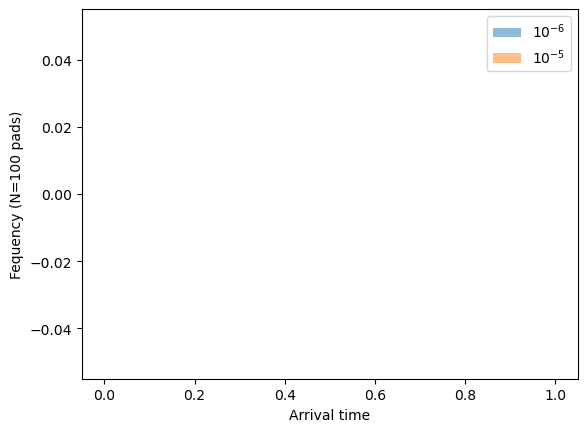

In [6]:
plt.hist(t0L * np.mean(np.diff(t)) / 3600, bins=10, alpha=0.5)
plt.hist(t0H * np.mean(np.diff(t)) / 3600, bins=10, alpha=0.5)
plt.legend(['$10^{-6}$', '$10^{-5}$'])
plt.xlabel('Arrival time')
plt.ylabel('Fequency (N=100 pads)')

In [7]:

for p in pos:
    zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
    print(zero_crossings)


NameError: name 'uthresh' is not defined

In [8]:
for t in range(200):
    plt.contour(uthresh[t,:,:], 0, origin='lower')
    plt.plot(pos[:,1], pos[:,0], 'w+')
    plt.savefig('pad_diffusion/diffusion_%04d.png'%t)
    plt.close()

NameError: name 'uthresh' is not defined

In [9]:
t0 = np.zeros((100,100)) + np.nan
for x in range(100):
    for y in range(100):
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,x,y]), axis=0))[0]
        if len(zero_crossings)>0:
            t0[x,y] = zero_crossings[0]

NameError: name 'uthresh' is not defined

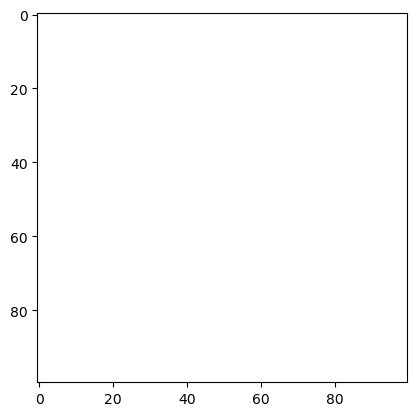

In [10]:
plt.imshow(t0)

Text(0.5, 0, 'Unit price of risk')

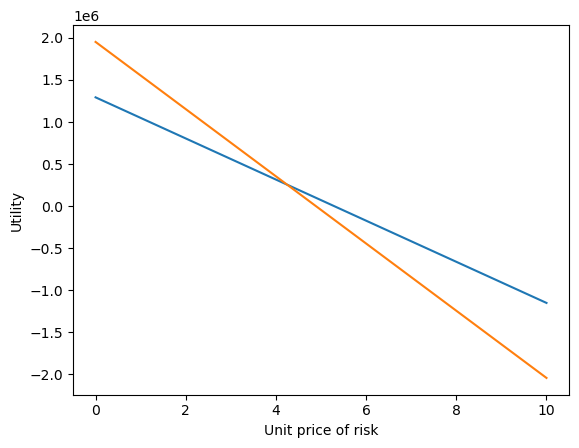

In [11]:
AL = 146283
sigmaL = 82188
NL = 8.84

AH = 404131
sigmaH = 181733
NH = 4.83

r = np.linspace(0, 10)
plt.plot(r, NL * AL - r * sigmaL * np.sqrt(NL))
plt.plot(r, NH * AH - r * sigmaH * np.sqrt(NH))
plt.ylabel('Utility')
plt.xlabel('Unit price of risk')

In [150]:
import json
f = open('metadata.txt')
s = f.readline()
metadata = json.loads(s)
pos_list = metadata['InitialPositionList']
all_pos = [p['DeviceCoordinatesUm']['TIXYDrive'] for p in pos_list]
all_pos = np.array(all_pos) * 1e-6

pos1 = all_pos[[0,1],:]
pos2 = all_pos[[2,3,4,5,6,7,8],:]
pos3 = all_pos[[9,10,11,12,13],:]
pos4 = all_pos[[14,15,16],:]
pos5 = all_pos[[17,18,19,20,21,22,23,24,25],:]
pos6 = all_pos[[26,27,28,29,30,31],:]
pos7 = all_pos[[32,33,34,35],:]

pos1 = pos1 - pos1.mean(axis=0)
pos1 = pos1 / dx
pos1[:,0] = pos1[:,0] + nx/2
pos1[:,1] = pos1[:,1] + ny/2
pos1 = pos1.astype(int) 

pos2 = pos2 - pos2.mean(axis=0) 
pos2 = pos2 / dx
pos2[:,0] = pos2[:,0] + nx/2
pos2[:,1] = pos2[:,1] + ny/2
pos2 = pos2.astype(int) 

pos3 = pos3 - pos3.mean(axis=0) 
pos3 = pos3 / dx
pos3[:,0] = pos3[:,0] + nx/2
pos3[:,1] = pos3[:,1] + ny/2
pos3 = pos3.astype(int) 

pos4 = pos4 - pos4.mean(axis=0) 
pos4 = pos4 / dx
pos4[:,0] = pos4[:,0] + nx/2
pos4[:,1] = pos4[:,1] + ny/2
pos4 = pos4.astype(int) 

pos5 = pos5 - pos5.mean(axis=0) 
pos5 = pos5 / dx
pos5[:,0] = pos5[:,0] + nx/2
pos5[:,1] = pos5[:,1] + ny/2
pos5 = pos5.astype(int) 

pos6 = pos6 - pos6.mean(axis=0) 
pos6 = pos6 / dx
pos6[:,0] = pos6[:,0] + nx/2
pos6[:,1] = pos6[:,1] + ny/2
pos6 = pos6.astype(int) 

pos7 = pos7 - pos7.mean(axis=0) 
pos7 = pos7 / dx
pos7[:,0] = pos7[:,0] + nx/2
pos7[:,1] = pos7[:,1] + ny/2
pos7 = pos7.astype(int) 

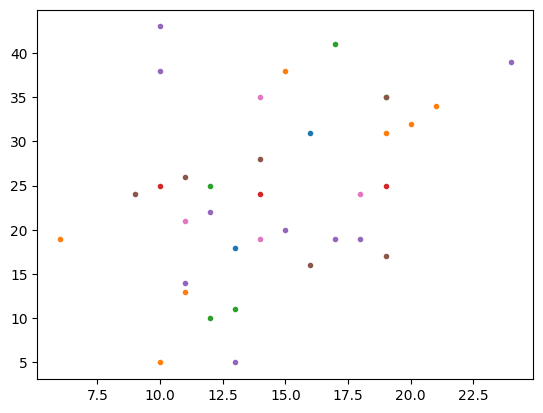

In [110]:
plt.plot(pos1[:,0], pos1[:,1], '.')
plt.plot(pos2[:,0], pos2[:,1], '.')
plt.plot(pos3[:,0], pos3[:,1], '.')
plt.plot(pos4[:,0], pos4[:,1], '.')
plt.plot(pos5[:,0], pos5[:,1], '.')
plt.plot(pos6[:,0], pos6[:,1], '.')
plt.plot(pos7[:,0], pos7[:,1], '.')

In [151]:
#t0_true1 = np.array([390, 371, 332, 259, 262, 252]) * 10 / 60
#t0_true2 = np.array([355, 323, 281]) * 10 / 60
#t0_true3 = np.array([374, 331]) * 10 / 60

t0_true = np.array([[182., 371.],
       [166., 324.],
       [165., 382.],
       [146., 340.],
       [161., 345.],
       [136., 268.],
       [128., 257.],
       [128., 259.],
       [155., 325.],
       [133., 312.],
       [133., 311.],
       [165., 356.],
       [154., 321.],
       [133., 294.],
       [55., 335.],
       [54., 292.],
       [51., 309.],
       [213., 397.],
       [188., 372.],
       [165., 326.],
       [125., 288.],
       [158., 309.],
       [158., 310.],
       [191., 405.],
       [188., 366.],
       [151., 338.],
       [164., 331.],
       [176., 338.],
       [169., 331.],
       [160., 286.],
       [170., 316.],
       [171., 348.],
       [181., 330.],
       [193., 353.],
       [198., 364.],
       [182., 339.]])
t0_true.shape

t0_true1 = t0_true[[0,1],1] * 10 / 60
t0_true2 = t0_true[[2,3,4,5,6,7,8],1] * 10 / 60
t0_true3 = t0_true[[9,10,11,12,13],1] * 10 / 60
t0_true4 = t0_true[[14,15,16],1] * 10 / 60
t0_true5 = t0_true[[17,18,19,20,21,22,23,24,25],1] * 10 / 60
t0_true6 = t0_true[[26,27,28,29,30,31],1] * 10 / 60
t0_true7 = t0_true[[32,33,34,35],1] * 10 / 60

#t0_true1 = t0_true[[0,1],1] * 10 / 60
#t0_true2 = t0_true[[2,4,6,7,8],1] * 10 / 60
#t0_true3 = t0_true[[11,12,13],1] * 10 / 60
#t0_true4 = t0_true[[14,15,16],1] * 10 / 60
#t0_true5 = t0_true[[17,18,19,21,24],1] * 10 / 60
#t0_true6 = t0_true[[29,30,31],1] * 10 / 60
#t0_true7 = t0_true[[32,34,35],1] * 10 / 60

In [152]:
t0_true5 / 10 * 60

array([397., 372., 326., 288., 309., 310., 405., 366., 338.])

In [166]:
def solve_diffusion(pos, kappa, gamma, dx, dt, ts):
    nt = len(ts)
    print(nt)
    u = np.zeros((nt+1,nx,ny))
    u[0,:,:] = u0
    for ti in range(nt):
        t = int(ts[ti] * dt)
        du = dudt(u[ti,:,:], t, pos, phi, kappa, gamma, dx)
        u[ti+1,:,:] = u[ti,:,:] + dt * du.reshape(nx,ny)
    return u

def arrival_times(pos, phi, kappa, gamma, thresh, plot=False):
    #u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,gamma,dx))
    u = solve_diffusion(pos, kappa, gamma, dx, dt, ts)
    u = u.reshape((len(ts)+1,nx,ny))
    if plot:
        plt.imshow(u[-1,:,:])
        plt.colorbar()
    umax = u.max()
    uthresh = u - thresh
    t0 = np.zeros((0,))
    for p in pos:
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
        if len(zero_crossings)>0:
            t0 = np.append(t0, zero_crossings[0])
        else:
            t0 = np.append(t0, np.nan)
    return t0 * dt / 3600

def u_err(pos, t0, phi, kappa, gamma, thresh, plot=False):
    #u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,gamma,dx))
    u = solve_diffusion(pos, kappa, gamma, dx, dt, ts)
    u = u.reshape((len(ts)+1,nx,ny))
    if plot:
        plt.imshow(u[-1,:,:])
        plt.colorbar()
    uthresh = u - thresh
    uerr = np.zeros_like(t0)
    for i in range(len(t0)):
        ti = int(t0[i] * 60 * 60 / dt)
        uerr[i] = uthresh[ti,pos[i,0],pos[i,1]]
    return uerr

In [161]:
phi = 1
kappa = 1e-11
gamma = 0
thresh = 2400
dt = 30
t = np.linspace(0, 72 * 60 * 60, 200)
ts = np.arange(0, 72 * 60 * 60 / dt)

8640
8640
8640
8640
8640
8640
8640


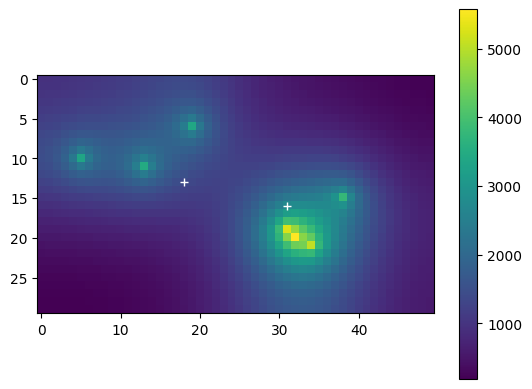

In [162]:
t01 = arrival_times(pos1, phi, kappa, gamma, thresh, plot=False)
t02 = arrival_times(pos2, phi, kappa, gamma, thresh, plot=True)
t03 = arrival_times(pos3, phi, kappa, gamma, thresh, plot=False)
t04 = arrival_times(pos4, phi, kappa, gamma, thresh, plot=False)
t05 = arrival_times(pos5, phi, kappa, gamma, thresh, plot=False)
t06 = arrival_times(pos6, phi, kappa, gamma, thresh, plot=False)
t07 = arrival_times(pos7, phi, kappa, gamma, thresh, plot=False)
plt.plot(pos1[:,1], pos1[:,0], 'w+')

[  0.96870524 -37.28990593]
[33.23333333 33.23333333 23.23333333 20.74166667 23.6         5.08333333
  4.075       6.75       17.675       6.1         6.1        29.2
 20.85833333 21.375      14.48333333 11.8        16.84166667 24.06666667
 15.8        10.44166667  5.43333333  3.025       3.475      28.075
 17.69166667 17.55833333 11.90833333 12.03333333 10.1         7.98333333
 11.6        24.60833333 12.69166667 12.04166667 17.975      29.54166667]
[[1.         0.65704302]
 [0.65704302 1.        ]]


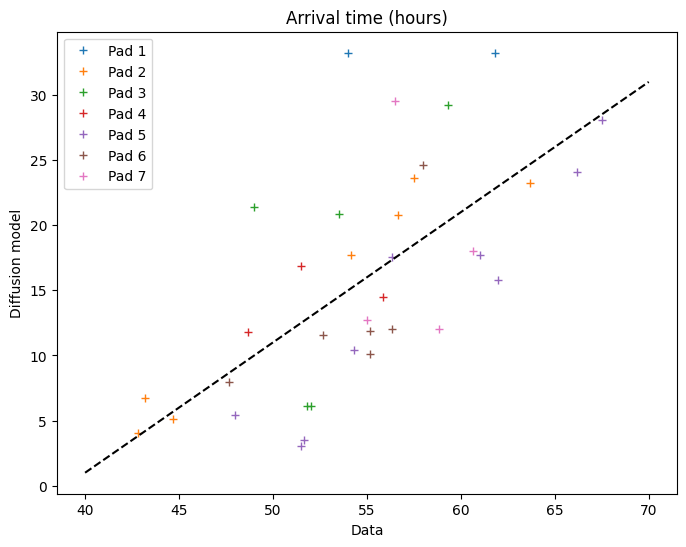

In [163]:
plt.figure(figsize=(8,6))

plt.plot(t0_true1, t01, '+')
plt.plot(t0_true2, t02, '+')
plt.plot(t0_true3, t03, '+')
plt.plot(t0_true4, t04, '+')
plt.plot(t0_true5, t05, '+')
plt.plot(t0_true6, t06, '+')
plt.plot(t0_true7, t07, '+')
x = np.concatenate([t0_true1,t0_true2,t0_true3,t0_true4,t0_true5,t0_true6,t0_true7])
y = np.concatenate([t01,t02,t03,t04,t05,t06,t07])
p = np.polyfit(x, y, deg=1)
print(p)
intercept = np.nanmean(y-x)
plt.plot([40,70], [intercept + 40, intercept + 70], 'k--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Diffusion model')
plt.title('Arrival time (hours)')
print(y)
plt.legend(['Pad 1', 'Pad 2', 'Pad 3', 'Pad 4', 'Pad 5', 'Pad 6', 'Pad 7',])

print(np.corrcoef(x,y))

In [23]:
nthresh = 10
thresh = np.linspace(0, 1e4, nthresh)
err = np.zeros((nthresh,len(pos1))) + np.nan
for ti in range(nthresh):
    t0 = arrival_times(pos1, phi, kappa, gamma, thresh[ti], plot=False)
    err[ti,:] = t0 - t0_true1


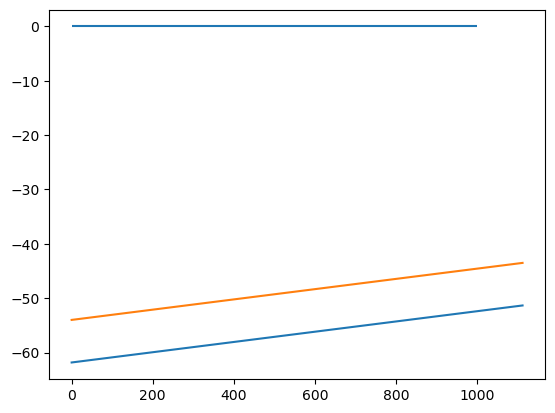

In [24]:
plt.plot(thresh, err)
plt.hlines([0], [0], [1e3])

In [187]:
def residuals(x):
    thresh,offset = np.exp(x)
    kappa = 1e-12
    print(kappa,thresh, offset)
    #t01 = arrival_times(pos1, phi, kappa, gamma, thresh, plot=False)
    #t02 = arrival_times(pos2, phi, kappa, gamma, thresh, plot=False)
    #t03 = arrival_times(pos3, phi, kappa, gamma, thresh, plot=False)
    #t04 = arrival_times(pos4, phi, kappa, gamma, thresh, plot=False)
    #t05 = arrival_times(pos5, phi, kappa, gamma, thresh, plot=False)
    #t06 = arrival_times(pos6, phi, kappa, gamma, thresh, plot=False)
    #t07 = arrival_times(pos7, phi, kappa, gamma, thresh, plot=False)
    
    #resid2 = t02 - t0_true2 + offset
    #resid1 = t01 - t0_true1 + offset
    #resid3 = t03 - t0_true3 + offset
    #resid4 = t04 - t0_true4 + offset
    #resid5 = t05 - t0_true5 + offset
    #resid6 = t06 - t0_true6 + offset
    #resid7 = t07 - t0_true7 + offset

    resid1 = u_err(pos1, t0_true1 - offset, phi, kappa, gamma, thresh, plot=False)
    resid2 = u_err(pos2, t0_true2 - offset, phi, kappa, gamma, thresh, plot=False)
    resid3 = u_err(pos3, t0_true3 - offset, phi, kappa, gamma, thresh, plot=False)
    resid4 = u_err(pos4, t0_true4 - offset, phi, kappa, gamma, thresh, plot=False)
    resid5 = u_err(pos5, t0_true5 - offset, phi, kappa, gamma, thresh, plot=False)
    resid6 = u_err(pos6, t0_true6 - offset, phi, kappa, gamma, thresh, plot=False)
    resid7 = u_err(pos7, t0_true7 - offset, phi, kappa, gamma, thresh, plot=False)

    resid = np.concatenate([resid1,resid2,resid3,resid4,resid5,resid6,resid7]) / thresh
    print(x)
    mse = np.mean(resid*resid)
    print(mse)
    return mse
    #return resid

In [188]:
from scipy.optimize import least_squares, fmin, basinhopping, brute, differential_evolution

lb = np.log([1e-12,2000,30])
ub = np.log([1e-10,3000,50])
bounds = [lb, ub]
#res = least_squares(residuals, [5.73853003e+02, 4.08424025e+01], bounds=bounds) # , diff_step=1e-3, ftol=1e-1, xtol=1e-6)
xopt = fmin(residuals, np.log([5000,40]), ftol=10)
#res = differential_evolution(residuals, bounds)
res

1e-12 5000.000000000004 40.0
8640
8640
8640
8640
8640
8640
8640
[8.51719319 3.68887945]
2.94972469533006
1e-12 7654.529560319348 40.0
8640
8640
8640
8640
8640
8640
8640
[8.94305285 3.68887945]
0.6248285777564222
1e-12 5000.000000000004 48.101984151873395
8640
8640
8640
8640
8640
8640
8640
[8.51719319 3.87332343]
3.691933740059012
1e-12 7654.529560319362 33.262661160676586
8640
8640
8640
8640
8640
8640
8640
[8.94305285 3.50443548]
1.0160317519969937
1e-12 11718.364557960535 33.2626611606766
8640
8640
8640
8640
8640
8640
8640
[9.36891251 3.50443548]
0.10480944075152308
1e-12 17939.713581501484 30.33231042584953
8640
8640
8640
8640
8640
8640
8640
[9.79477217 3.4122135 ]
0.019791966607402362
1e-12 17939.71358150145 36.47610788484798
8640
8640
8640
8640
8640
8640
8640
[9.79477217 3.59665747]
0.045427943536876944
1e-12 42044.82076268601 27.660115687249665
8640
8640
8640
8640
8640
8640
8640
[10.64649149  3.31999151]
0.3747319788775253
1e-12 27464.013582653097 30.332310425849585
8640
8640
8640

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.086e+04]
           x: [ 7.727e+02  4.084e+01]
        cost: 217619127.9282892
         jac: [[ 6.900e-04  0.000e+00]]
        grad: [ 1.440e+01  0.000e+00]
  optimality: 11123.877948549583
 active_mask: [0 0]
        nfev: 23
        njev: 12

1e-11 2300 40
8640
8640
8640
8640
8640
8640
[  0.80298568 -30.96353409]


array([[1.        , 0.68226838],
       [0.68226838, 1.        ]])

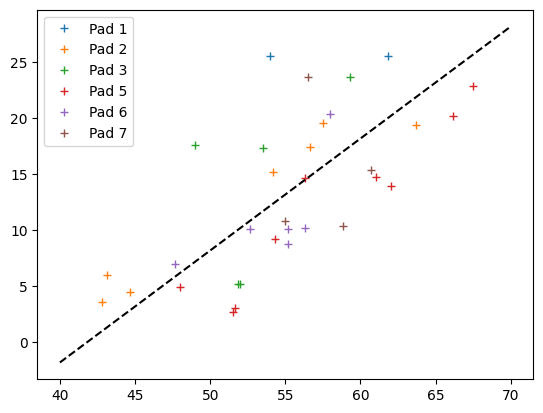

In [190]:
thresh0, offset = np.exp(xopt)
thresh0, offset = 2300,40
kappa0 = 1e-11

print(kappa0, thresh0, offset)

t01 = arrival_times(pos1, phi, kappa0, gamma, thresh0)
plt.plot(t0_true1, t01, '+')

t02 = arrival_times(pos2, phi, kappa0, gamma, thresh0)
plt.plot(t0_true2, t02, '+')

t03 = arrival_times(pos3, phi, kappa0, gamma, thresh0)
plt.plot(t0_true3, t03, '+')

#t04 = arrival_times(pos4, phi, kappa0, gamma, thresh0)
#plt.plot(t0_true4, t04, '+')

t05 = arrival_times(pos5, phi, kappa0, gamma, thresh0)
plt.plot(t0_true5, t05, '+')

t06 = arrival_times(pos6, phi, kappa0, gamma, thresh0)
plt.plot(t0_true6, t06, '+')

t07 = arrival_times(pos7, phi, kappa0, gamma, thresh0)
plt.plot(t0_true7, t07, '+')

plt.legend(['Pad 1', 'Pad 2', 'Pad 3', 'Pad 5', 'Pad 6', 'Pad 7',])

x = np.concatenate([t0_true1,t0_true2,t0_true3,t0_true5,t0_true6,t0_true7])
y = np.concatenate([t01,t02,t03,t05,t06,t07])
p = np.polyfit(x, y, deg=1)
print(p)
intercept = np.nanmean(y-x)
plt.plot([40,70], [intercept + 40, intercept + 70], 'k--')

np.corrcoef(x,y)

In [720]:
resid = residuals(np.log([1400,40]))

[7.24422752 3.68887945]
655.147963435267
